In [6]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
df = pd.read_csv("./data/c3.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)
df.asfreq('MS')
y = df['Consumption']
y.head()

Datetime
1988-01-01    107.5052
1988-02-01    105.6720
1988-03-01     97.4502
1988-04-01     92.4714
1988-05-01     90.3151
Name: Consumption, dtype: float64

In [31]:
model = ExponentialSmoothing(
    y,
    seasonal='add',
    seasonal_periods=12
)
result = model.fit()

forecast = result.fittedvalues

D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


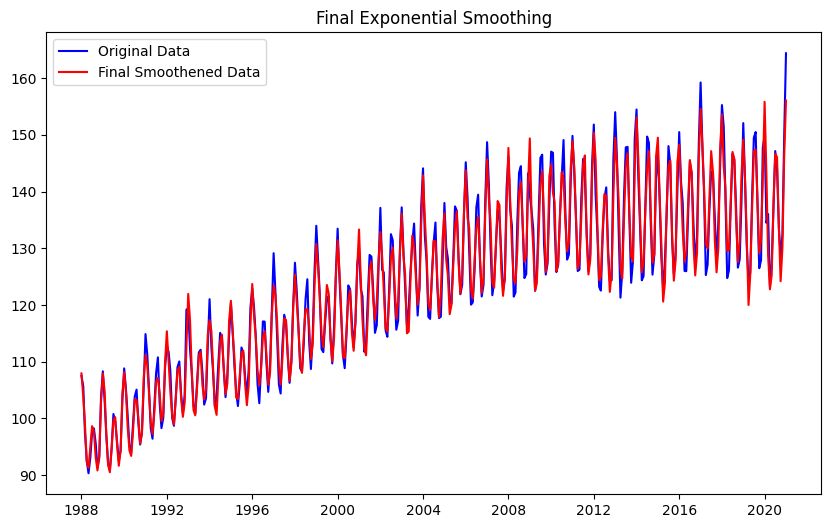

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y, color='blue', label='Original Data')
plt.plot(forecast, color='red', label='Final Smoothened Data')
plt.title("Final Exponential Smoothing")
plt.legend()
plt.show()